In [1]:
import pandas as pd

user_log = pd.read_csv('takehome_user_engagement.csv',parse_dates=True)

user_log.columns

Index(['time_stamp', 'user_id', 'visited'], dtype='object')

In [2]:
print('Data points:' , len(user_log))
print('Unique users: ', user_log['user_id'].nunique())
print(user_log.info())

Data points: 207917
Unique users:  8823
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB
None


In [3]:
# change the time_stamp to date_time so that it can be sorted and compared
time = pd.to_datetime(user_log['time_stamp'])
user_log['time_stamp'] = time
user_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [4]:
adopted_users = list()
adopted_users_filename = 'adopted_users'

try:
    with open(adopted_users_filename,'r') as filehandle:
        print('opened adopted_users file')
        for line in filehandle:
            current_line = line[:-1]
            adopted_users.append(int(current_line))
except:
    print('regenerating adopted_users file')
    # first make sure the data is sorted:
    sorted_users = user_log.sort_values(['user_id','time_stamp'])

    # create a dictionary with user as the key and a list of login times as the value

    from collections import defaultdict

    user_delta = defaultdict(list)

    for i in range(len(user_log)):
        user_delta[user_log.iloc[i]['user_id']].append(user_log.iloc[i]['time_stamp']) 

    # iterate through the dict to find users with at least three logins in a consecutive 7 day period.
    # do this by looking two login time's ahead

    adopted_users = list()

    for user in user_delta.keys():
        for i in range(0,len(user_delta[user])-2):
            if user_delta[user][i+2] - user_delta[user][i] < pd.Timedelta('7 days'):
                adopted_users.append(user)
                break
    with open(adopted_users_filename,'w') as filehandle:
        for adopted_user in adopted_users:
            filehandle.write('%s\n' % adopted_user)

opened adopted_users file


This step takes a long time. We can save the results for reuse if the notebook is restarted.

OK, now we've identified a list of adopted users. Now we need to import the feature data:

In [6]:
features = pd.read_csv('takehome_users.csv',encoding = "ISO-8859-1")
print(features.info())
features.sample(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB
None


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6794,6795,2014-05-18 22:06:39,Ribeiro Júlia,JuliaPereiraRibeiro@yahoo.com,PERSONAL_PROJECTS,1.400537e+09,0,0,245,NaN
7611,7612,2013-12-09 07:53:58,Williamson Georgia,GeorgiaWilliamson@yahoo.com,ORG_INVITE,1.386576e+09,0,0,39,1484.0
1406,1407,2012-09-25 21:38:18,Andreasen Astrid,AstridBAndreasen@yahoo.com,GUEST_INVITE,1.401745e+09,0,0,44,9294.0
4421,4422,2013-07-16 09:49:45,Deegan Laurie,LauriePDeegan@gustr.com,SIGNUP,1.374141e+09,0,0,50,NaN
5664,5665,2012-08-05 05:48:58,Wood James,JamesWood@gmail.com,ORG_INVITE,1.344146e+09,0,0,17,2026.0
9472,9473,2014-04-27 16:11:37,Boehm Patrick,PatrickBoehm@yahoo.com,SIGNUP,1.398788e+09,1,1,7,NaN
8393,8394,2013-12-06 17:37:42,Oster Sabine,SabineOster@gustr.com,ORG_INVITE,1.397929e+09,0,0,381,9986.0
1864,1865,2012-09-06 15:06:27,Cherry Lucinda,LucindaCherry@gmail.com,SIGNUP_GOOGLE_AUTH,1.401894e+09,0,0,415,NaN
3268,3269,2012-09-03 01:03:55,Outtrim Gemma,GemmaOuttrim@jourrapide.com,GUEST_INVITE,1.401844e+09,1,1,148,3269.0
11715,11716,2012-09-14 14:17:43,Peake Nate,NatePeake@gustr.com,ORG_INVITE,1.347632e+09,1,1,406,3139.0


There are missing values in the "invited by user id" and "last session creation time". Handling the former could be done with a sophisticated model, but we can assume that the NaN values represent customers who weren't invited. So, we'll treat this as a simple binary value with NaN's treated as zeros and any other value treated as 1.

The other column is a bit more hard to understand. Are there any customers with NaN last-session-creation-time who might be adopted users? If not, we can disregard this column. This might be especially true if the feature has litte value in predicting customer behavior.

In [7]:
features['adopted_user'] = features['object_id'].isin(adopted_users)
features.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False


In [8]:
# Target Balance 
features['adopted_user'].value_counts()

False    10398
True      1602
Name: adopted_user, dtype: int64

## Imbalanced target
We can see that the ratio of non-adopted users to adopted users is nearly 10:1. This is an imbalanced learning task. 

Convert the email address into its domain only

In [9]:
features['email_domain'] = features['email'].str.split('@').str[1]
features['email_domain'].value_counts().head(20)

gmail.com         3562
yahoo.com         2447
jourrapide.com    1259
cuvox.de          1202
gustr.com         1179
hotmail.com       1165
xvnbr.com            2
oqpze.com            2
mumdc.com            2
xybhi.com            2
rerwl.com            2
dqwln.com            2
qgjbc.com            2
luque.com            2
dzpyd.com            1
wteoj.com            1
cylik.com            1
lluqv.com            1
gctmd.com            1
kmgtc.com            1
Name: email_domain, dtype: int64

In [10]:
# Too many domains to be useful as a categorical feature, but there are a few top domains that seem worthwhile. 
# Let's drop the lesser-known domains

domains = features['email_domain'].value_counts().gt(5)
big_domains = set(domains[domains].index)
big_domains

def reclassify_domain(domain):
    if domain in big_domains:
        return domain
    else:
        return 'other'

features['email_domain'] = features['email_domain'].apply(reclassify_domain)
features

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,False,gustr.com
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,False,gmail.com
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,False,cuvox.de
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,False,other


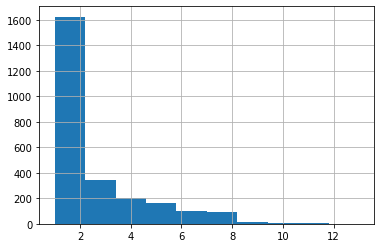

In [11]:
# How many "inviters" are there?
# This is the step in which 

features['invited_by_user_id'].value_counts().hist()

In [12]:
from numpy import isnan

connections = features['invited_by_user_id'].value_counts()

def num_connections(user_id):
    if isnan(user_id):
        return 0
    else:
        return connections[user_id]

features['invited_by_connections'] = features['invited_by_user_id'].apply(num_connections)
features['org_id'] = features['org_id'].astype(str)
features

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,email_domain,invited_by_connections
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,False,yahoo.com,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,True,gustr.com,3
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,False,gustr.com,11
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,False,yahoo.com,7
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,False,yahoo.com,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0,False,gustr.com,7
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN,False,gmail.com,0
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0,False,cuvox.de,5
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN,False,other,0


Now we're ready to finalize the data for modeling. I'll drop the name, email, last creation time, and invited by user id. The target value is adopted_user.



In [13]:
target = features['adopted_user']
features = features.drop(['object_id','creation_time','adopted_user','name','email','last_session_creation_time','invited_by_user_id'],axis=1)
features

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,email_domain,invited_by_connections
0,GUEST_INVITE,1,0,11,yahoo.com,1
1,ORG_INVITE,0,0,1,gustr.com,3
2,ORG_INVITE,0,0,94,gustr.com,11
3,GUEST_INVITE,0,0,1,yahoo.com,7
4,GUEST_INVITE,0,0,193,yahoo.com,5
...,...,...,...,...,...,...
11995,ORG_INVITE,0,0,89,gustr.com,7
11996,SIGNUP_GOOGLE_AUTH,0,0,200,gmail.com,0
11997,GUEST_INVITE,1,1,83,cuvox.de,5
11998,PERSONAL_PROJECTS,0,0,6,other,0


In [24]:
features_one_hot = pd.get_dummies(features,drop_first=True)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features_one_hot,target,test_size=0.33,random_state=1)

import xgboost as xgb

# Instantiate an "Xtreme Gradient Boosting" classifier - a variant on a random forest

model = xgb.XGBClassifier()

In [25]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

              precision    recall  f1-score   support

       False       0.86      1.00      0.92      3394
        True       0.25      0.00      0.01       566

    accuracy                           0.86      3960
   macro avg       0.55      0.50      0.46      3960
weighted avg       0.77      0.86      0.79      3960

Balanced Accuracy:  0.5008828716650251


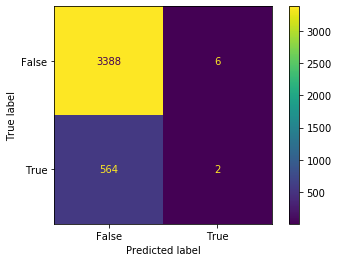

In [26]:
y_pred = model.predict(X_test)

from sklearn.metrics import plot_confusion_matrix, classification_report, balanced_accuracy_score

print(classification_report(y_test,y_pred))
print('Balanced Accuracy: ', balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(model,X_test,y_test)

In [28]:
j = 0
for i in sorted(range(len(X_train.columns)), key = lambda k: model.feature_importances_[k],reverse=True):
    print(model.feature_importances_[i],':',X_train.columns[i])
    j += 1
    if j >= 10:
        break

0.023497846 : creation_source_PERSONAL_PROJECTS
0.02025986 : org_id_35
0.013342359 : org_id_280
0.012314277 : org_id_415
0.012077252 : org_id_270
0.011554899 : org_id_119
0.01145913 : org_id_317
0.011423245 : org_id_34
0.011180251 : org_id_82
0.011165482 : org_id_44


              precision    recall  f1-score   support

       False       0.88      0.42      0.56      3394
        True       0.16      0.65      0.25       566

    accuracy                           0.45      3960
   macro avg       0.52      0.53      0.41      3960
weighted avg       0.77      0.45      0.52      3960

Balanced Accuracy:  0.5319244520053056


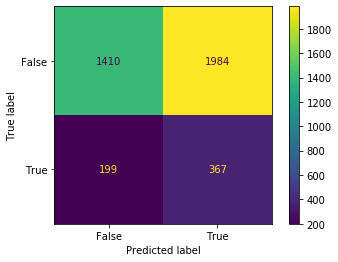

In [33]:
from imblearn.ensemble import EasyEnsembleClassifier

model2 = EasyEnsembleClassifier(random_state=1, n_estimators = 100)
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print(classification_report(y_test,y_pred))
print('Balanced Accuracy: ', balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(model2,X_test,y_test)

In [34]:
import numpy as np

feature_importances = np.mean([est.steps[1][1].feature_importances_ for est in model2.estimators_], axis=0)

j = 0
for i in sorted(range(len(X_train.columns)), key = lambda k: feature_importances[k],reverse=True):
    print(feature_importances[i],':',X_train.columns[i])
    j += 1
    if j >= 10:
        break

0.02780000000000002 : invited_by_connections
0.020800000000000013 : creation_source_PERSONAL_PROJECTS
0.01560000000000001 : org_id_1
0.014400000000000008 : creation_source_ORG_INVITE
0.014400000000000008 : org_id_235
0.014200000000000008 : org_id_387
0.014000000000000007 : email_domain_hotmail.com
0.012400000000000007 : org_id_44
0.012200000000000006 : org_id_152
0.012200000000000006 : org_id_3
